# SI 618: Data Manipulation and Analysis
## 08 - Clustering
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

### <font color="magenta">Q1: Record your music preferences</font>

Fill in your music preferences on https://docs.google.com/spreadsheets/d/1KY8tBiiSeehMDxXc4GU_mOoD8MRnUVkUtinadNJEgrU/edit?usp=sharing

Values should range from 1 to 10.  1=no way; 10=the best.  Please fill in a value for each column.

We will be downloading the completed sheet to use as data for this class.


![](resources/clustering/Slide01.png)

![](resources/clustering/Slide02.png)

![](resources/clustering/Slide03.png)

![](resources/clustering/Slide01.png)

![](resources/clustering/Slide04.png)

![](resources/clustering/Slide07.png)

![](resources/clustering/Slide09.png)

![](resources/clustering/Slide10.png)

![](resources/clustering/Slide11.png)

![](resources/clustering/Slide12.png)

![](resources/clustering/Slide13.png)

![](resources/clustering/Slide14.png)

![](resources/clustering/Slide15.png)

![](resources/clustering/Slide16.png)

![](resources/clustering/Slide17.png)

![](resources/clustering/Slide18.png)

![](resources/clustering/Slide19.png)

![](resources/clustering/Slide20.png)

![](resources/clustering/Slide21.png)

![](resources/clustering/Slide22.png)

![](resources/clustering/Slide23.png)

![](resources/clustering/Slide24.png)

![](resources/clustering/Slide25.png)

## NOW: Download music_wn2019.csv from Slack

In [1]:
%matplotlib inline

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import pandas as pd
import seaborn as sns

In [3]:
music = pd.read_csv('data/music_wn2019.csv')

In [4]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock,Soul-R-and-B
0,Chris,6,9,4,2,6.0,1,8,5,6,9,5.0
1,Scott,4,9,2,2,6.0,4,9,6,8,7,9.0
2,Shiyan,7,10,5,1,1.0,2,5,4,6,3,3.0
3,Yujia,4,6,5,6,1.0,10,7,7,7,5,4.0
4,Sagnik,4,3,7,5,8.0,7,9,4,8,9,9.0


In [5]:
music = music.dropna() # Clustering doesn't like NaNs
music_indexed_by_name = music.set_index('Name')

In [6]:
music_indexed_by_name.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock,Soul-R-and-B
Name,,,,,,,,,,,
Chris,6,9,4,2,6.0,1,8,5,6,9,5.0
Scott,4,9,2,2,6.0,4,9,6,8,7,9.0
Shiyan,7,10,5,1,1.0,2,5,4,6,3,3.0
Yujia,4,6,5,6,1.0,10,7,7,7,5,4.0
Sagnik,4,3,7,5,8.0,7,9,4,8,9,9.0


In [7]:
model = AgglomerativeClustering(n_clusters=3) # we can make up the value for clusters
model.fit_predict(music_indexed_by_name)

array([1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2])

In [8]:
music_indexed_by_name['cluster'] = model.labels_

In [9]:
music_indexed_by_name.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock,Soul-R-and-B,cluster
Name,,,,,,,,,,,,
Chris,6,9,4,2,6.0,1,8,5,6,9,5.0,1
Scott,4,9,2,2,6.0,4,9,6,8,7,9.0,1
Shiyan,7,10,5,1,1.0,2,5,4,6,3,3.0,0
Yujia,4,6,5,6,1.0,10,7,7,7,5,4.0,0
Sagnik,4,3,7,5,8.0,7,9,4,8,9,9.0,1


### Plot Hierarachical Clustering Dendrogram 
The following function plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.

It was writte by Mathew Kallada and modified by Chris Teplovs.
It is licensed under the BSD clause.

In [10]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



In [11]:
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(music_indexed_by_name)
music_indexed_by_name['cluster'] = model.labels_

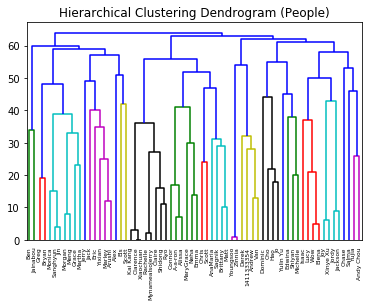

In [12]:
plt.title('Hierarchical Clustering Dendrogram (People)')
plot_dendrogram(model,labels=music_indexed_by_name.index.values)
plt.xticks(rotation=90)
plt.savefig('musicprefs.pdf',format='pdf')
plt.show()

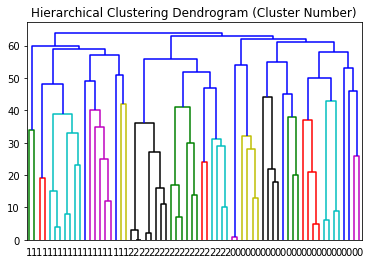

In [14]:
plt.title('Hierarchical Clustering Dendrogram (Cluster Number)')
plot_dendrogram(model,labels=model.labels_)
plt.xticks(rotation=0, fontsize = 10)
plt.show()

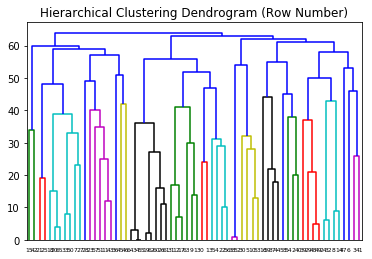

In [17]:
plt.title('Hierarchical Clustering Dendrogram (Row Number)')
plot_dendrogram(model)
plt.xticks(rotation=0)
plt.show()

### <font color="magenta">Q2: What's the "best" choice for the number of clusters?  What are your options? How would you choose? </font>

I may prefer to choose 6 clusters. If we choose too many clusters, meaning too mcuh informaiton, we could not get useful information. Since we have 66 samples in this case, therefore, I think 6 cluster is a reasonable.

### <font color="magenta">Q3: Describe the characteristics of each of the clusters (i.e. use groupby() and then describe()).  Use complete sentences to interpret your results

In [28]:
music_indexed_by_name.groupby(by='cluster').describe().stack()

Blues  Classical    Country  Electronic       Folk  \
cluster                                                                 
0       count  26.000000  26.000000  26.000000   26.000000  26.000000   
        mean    6.038462   7.500000   3.846154    5.000000   4.692308   
        std     2.271225   1.816590   2.602957    2.592296   2.526171   
        min     1.000000   4.000000   1.000000    1.000000   1.000000   
        25%     4.250000   6.000000   1.250000    3.000000   3.000000   
        50%     6.500000   8.000000   3.000000    5.000000   5.000000   
        75%     7.000000   8.750000   5.750000    7.000000   6.750000   
        max    10.000000  11.000000   9.000000    9.000000   9.000000   
1       count  20.000000  20.000000  20.000000   20.000000  20.000000   
        mean    3.500000   3.800000   3.350000    6.550000   4.050000   
        std     2.236068   1.823819   2.641272    2.645254   1.904980   
        min     1.000000   1.000000   1.000000    1.000000   1.000000   
        25%     1.000000   2.750000   1.000000    5.750000   3.000000   
        50%     4.000000   4.000000   2.500000    7.000000   4.000000   
        75%     5.000000   5.000000   5.250000    8.250000   5.250000   
        max     8.000000   7.000000   9.000000   10.000000   7.000000   
2       count  20.000000  20.000000  20.000000   20.000000  20.000000   
        mean    6.550000   7.100000   5.250000    6.250000   6.550000   
        std     1.637553   2.049390   1.970172    2.489451   1.190975   
        min     4.000000   3.000000   2.000000    2.000000   4.000000   
        25%     5.750000   5.750000   4.000000    4.750000   6.000000   
        50%     7.000000   8.000000   5.500000    6.500000   6.000000   
        75%     7.250000   8.250000   7.000000    8.000000   8.000000   
        max    10.000000  10.000000   8.000000   10.000000   8.000000   

                 Hip Hop       Jazz      Latin        Pop       Rock  \
cluster                                                                
0       count  26.000000  26.000000  26.000000  26.000000  26.000000   
        mean    5.423077   5.884615   4.000000   5.692308   6.192308   
        std     2.655908   1.986493   2.019901   2.619454   2.545887   
        min     1.000000   2.000000   1.000000   1.000000   3.000000   
        25%     4.000000   5.000000   3.000000   3.500000   4.000000   
        50%     5.000000   6.000000   4.000000   6.000000   6.000000   
        75%     7.750000   7.000000   4.750000   7.750000   8.000000   
        max    10.000000   9.000000   9.000000  10.000000  10.000000   
1       count  20.000000  20.000000  20.000000  20.000000  20.000000   
        mean    7.600000   5.750000   4.250000   7.050000   6.150000   
        std     1.818038   2.314144   1.743409   2.211810   2.412140   
        min     4.000000   1.000000   2.000000   2.000000   1.000000   
        25%     6.000000   4.000000   3.000000   6.000000   5.000000   
        50%     8.000000   6.500000   4.000000   8.000000   7.000000   
        75%     9.000000   7.250000   5.250000   9.000000   8.000000   
        max    10.000000   9.000000   8.000000   9.000000   9.000000   
2       count  20.000000  20.000000  20.000000  20.000000  20.000000   
        mean    6.600000   7.550000   6.700000   7.450000   8.250000   
        std     1.957442   1.099043   1.490320   1.538112   1.019546   
        min     1.000000   6.000000   4.000000   4.000000   7.000000   
        25%     6.000000   7.000000   5.750000   6.000000   7.750000   
        50%     7.000000   7.000000   7.000000   8.000000   8.000000   
        75%     8.000000   8.250000   8.000000   8.250000   9.000000   
        max     9.000000  10.000000   9.000000  10.000000  10.000000   

               Soul-R-and-B  
cluster                      
0       count     26.000000  
        mean       4.846154  
        std        2.327098  
        min        1.000000  
        25%        3.000000  
        50%        4.500000  
       

With 3 number of clusters, in blues, it seems cluster 0 and cluster 2 have similar mean about 6, while mean is 3.5 in cluster 1. Also, for standard deviation, cluster 0 and cluster 1 are under simialr level, while std in cluster 2 is smaller than the others. Therefore, 3 clusters did have some difference in Blues. 

# K-Means Clustering

![](resources/clustering/Slide26.png)

![](resources/clustering/Slide27.png)

![](resources/clustering/Slide28.png)

![](resources/clustering/Slide31.png)

![](resources/clustering/Slide32.png)

![](resources/clustering/Slide33.png)

![](resources/clustering/Slide34.png)

![](resources/clustering/Slide36.png)

![](resources/clustering/Slide37.png)

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
kmeans = KMeans(n_clusters=3) # start with 3 clusters
kmeans.fit(music_indexed_by_name)
print("Labels:")
print(kmeans.labels_)


Labels:
[1 1 1 0 2 1 0 0 1 2 1 0 2 2 1 0 0 2 2 2 0 0 1 2 1 0 2 0 2 0 1 2 0 0 2 1 0
 1 1 2 0 1 0 0 1 0 0 1 2 0 0 0 1 1 1 2 2 0 1 0 2 2 2 2 2 0]


In [112]:
data = music_indexed_by_name.copy()

And now let's join the labels with the original dataframe:

In [32]:
data_joined = pd.concat([pd.DataFrame(kmeans.labels_).reset_index(),music.reset_index()],axis=1).drop('index',axis=1)

In [33]:
data_joined.head()

,0,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock,Soul-R-and-B
0,1,Chris,6,9,4,2,6.0,1,8,5,6,9,5.0
1,1,Scott,4,9,2,2,6.0,4,9,6,8,7,9.0
2,1,Shiyan,7,10,5,1,1.0,2,5,4,6,3,3.0
3,0,Yujia,4,6,5,6,1.0,10,7,7,7,5,4.0
4,2,Sagnik,4,3,7,5,8.0,7,9,4,8,9,9.0


## Picking K – How many clusters?

A number of clustering methods, such as k-means, assumes the parameter k (#clusters) is known in advance, which is often not the case in practice. A number of techniques exist for determining the number of clusters in a dataset. See [this Wikipedia page](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for a detailed discussion.

In this section, we focus on four of the approaches:

1. Educated guessing
	* What are some criteria you could use?
2. Rule of thumb
3. The Elbow Method
4. The Silhouette Approach

Let us see if all the methods listed above will be able to recover the true number of clusters.

### Rule of Thumb

By rule of thumb, we could potentially choose the number of clusters as simply


$$ k \approx \sqrt{n/2} $$

where $n$ is the number of observations.

### The Elbow Method (Scree Plot)

Here, we plot the percentage of variance explained as a function of the number of clusters.

As we increase *k*, this percentage will naturally increase. Where we see diminishing returns to increasing *k* is a good place to stop, which corresponds to the "elbow" in the graph. This is a bit of an art, since the elbow is not unambiguous.


### The Silhouette Method

The silhouette coefficient is a measure of how closely a particular datum is matched to data and how loosely it is matched to data of that neighboring cluster.

You'd therefore expect that a datum that's a good match for its cluster to have a silhouette of 1, and a data that's a poor match to have a score of -1.

We can find the average silhouette of the data for particular values of *k*, and choose the maximum.


In [36]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

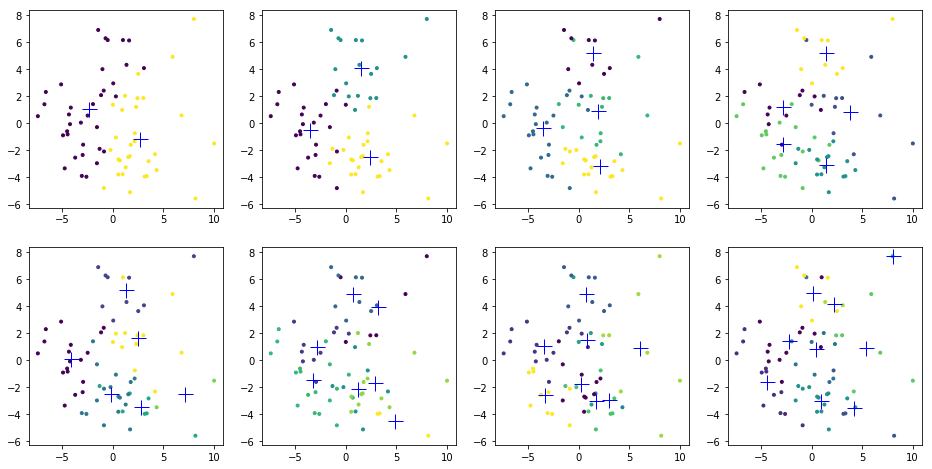

In [113]:
pca = PCA(n_components=2).fit(data)
data2d = pca.transform(data)

plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(data)
    scores.append(kmean.score(data))
    n_clusters.append(i)
    pred = kmean.predict(data)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
#     plt.title(f'{i} clusters silhoute= {np.round(silhouette_score(data, pred), decimals=5)}'')
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

### Example: Use these three methods (rule of thumb, elbow, and silhouette) to determine the ideal number of clusters for a k-means clustering of our music preferences data.</font>


Hints:

* Use inertia, the within-cluster sum of squares as the criterion for the elbow method. This is [available](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) in your `k_means` result as `k_means.inertia_`.
* The silhouette score can be computed with [sklearn.metrics.silhouette\_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score). `silhouette_score` takes two arguments: `data` and `k_means.labels_`.

In [55]:
np.sqrt(len(data)/2)

5.744562646538029

(1, 15.65)

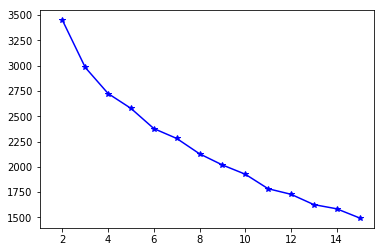

In [56]:
from sklearn import metrics

cost = []
for k in range(2,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(k_means.inertia_)

fig, ax = plt.subplots()
plt.plot(range(2,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])


(1, 15.65)

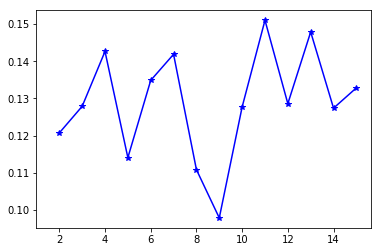

In [57]:
cost = []
for k in range(2,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(metrics.silhouette_score(data, k_means.labels_))

# kIdx = np.argmax(cost)
fig, ax = plt.subplots()
plt.plot(range(2,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

What did you get? Did they all agree?

# BREAK

## Applying what we just learned to a Pokemon dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### <font color="magenta">Q4: Study and describe the dataset at https://www.kaggle.com/alopez247/pokemon</a>
The data file has been provided in today's zip file as data/pokemon_alopez247.csv.

Provide a detailed description of the dataset in your own words.  Include items such as the shape of the dataset (i.e. the number of rows and columns), the number of continuous variables, the number of categorical variables, and so on.  Provide information about means, medians, etc. Provide graphical representations of the data (e.g. histograms, bar charts, scatterplots, etc.) where appropriate.

In [61]:
pokemon = pd.read_csv('data/pokemon_alopez247.csv',index_col='Name')

In [62]:
pokemon.head()

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


The column of this dataframe is mixed with categorical variables, such as Color, hasGender, and numerical variables, such as Total, HP and so on. 

### <font color="magenta">Q5: Create dummy variables for categorical variables.  </font>
We will discuss why you need to use ```drop_first=True``` argument to ```pd.get_dummies``` in class.  What is the shape of the resulting DataFrame?


In [75]:
pd.get_dummies(data=pokemon, drop_first=True).columns

Index([u'Number', u'Total', u'HP', u'Attack', u'Defense', u'Sp_Atk', u'Sp_Def',
       u'Speed', u'Generation', u'isLegendary', u'hasGender', u'Pr_Male',
       u'hasMegaEvolution', u'Height_m', u'Weight_kg', u'Catch_Rate',
       u'Type_1_Dark', u'Type_1_Dragon', u'Type_1_Electric', u'Type_1_Fairy',
       u'Type_1_Fighting', u'Type_1_Fire', u'Type_1_Flying', u'Type_1_Ghost',
       u'Type_1_Grass', u'Type_1_Ground', u'Type_1_Ice', u'Type_1_Normal',
       u'Type_1_Poison', u'Type_1_Psychic', u'Type_1_Rock', u'Type_1_Steel',
       u'Type_1_Water', u'Type_2_Dark', u'Type_2_Dragon', u'Type_2_Electric',
       u'Type_2_Fairy', u'Type_2_Fighting', u'Type_2_Fire', u'Type_2_Flying',
       u'Type_2_Ghost', u'Type_2_Grass', u'Type_2_Ground', u'Type_2_Ice',
       u'Type_2_Normal', u'Type_2_Poison', u'Type_2_Psychic', u'Type_2_Rock',
       u'Type_2_Steel', u'Type_2_Water', u'Color_Blue', u'Color_Brown',
       u'Color_Green', u'Color_Grey', u'Color_Pink', u'Color_Purple',
       u'Color_Red

In [76]:
print(pokemon.shape)
print(pokemon.dtypes)
print(pokemon.describe())

(721, 22)
Number                int64
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object
          Number       Total          HP      Attack     Defense      Sp_Atk  \
count  721.00000  721.000000  721.000000  721.000000  721.000000  721.000000   
mean   361.00000  417.945908   68.380028   75.013870   70.808599   68.737864   
std    208.27906  109.663671   25.848272   28.984475   29.296558   28.788005   
min      1.00000  180.000000    1.000000

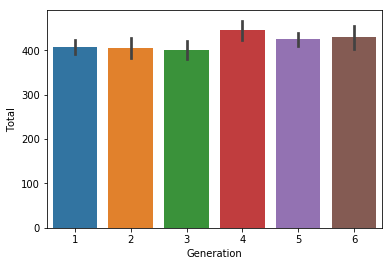

In [87]:
sns.barplot('Generation','Total',data=pokemon)

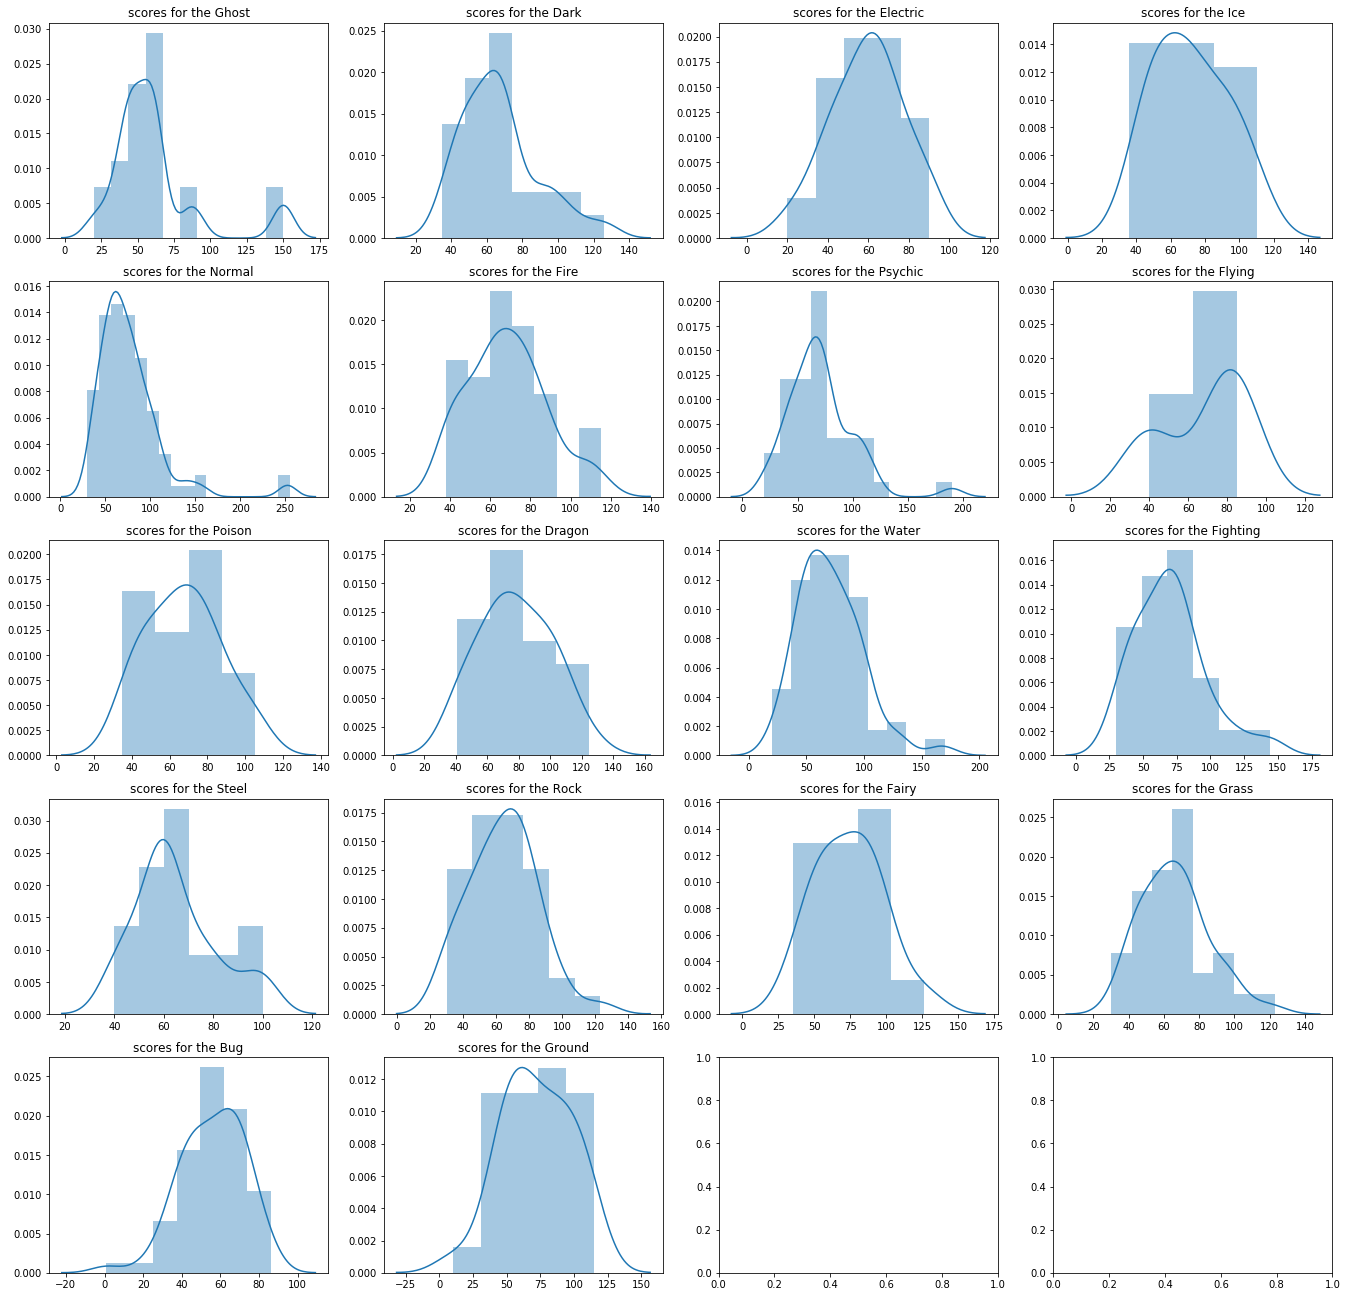

In [90]:
ability = ['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

def find_dis(df, plot_ncol, abil):
    for i, name in enumerate(set(df)): 
        Pokemon_sub = pokemon[df == name][[abil]]
        row = max(i//plot_ncol, 0)
        col = max(i % plot_ncol, 0)
        sns.distplot(Pokemon_sub, ax = axes[row, col]).set_title("scores for the " + str(name))
        
fig, axes = plt.subplots(5,4)
fig.set_size_inches((23,23))    
find_dis(pokemon['Type_1'], 4, ability[0])

From the above, we can notice that the dataframe has 721 rows and 22 columns. Also, from the dtypes and get_dummies, type with object, bool are categorical, so we can figure out 9 variable are dummy.

### <font color="magenta">Q6: Fit a 3-cluster agglomerative clustering model to the pokemon data (with dummy variables).</a>
Provide a graphical representation of the results and save the figure as a PDF file (Hint: use plt.savefig(...)).  Provide an interpretation of your results

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


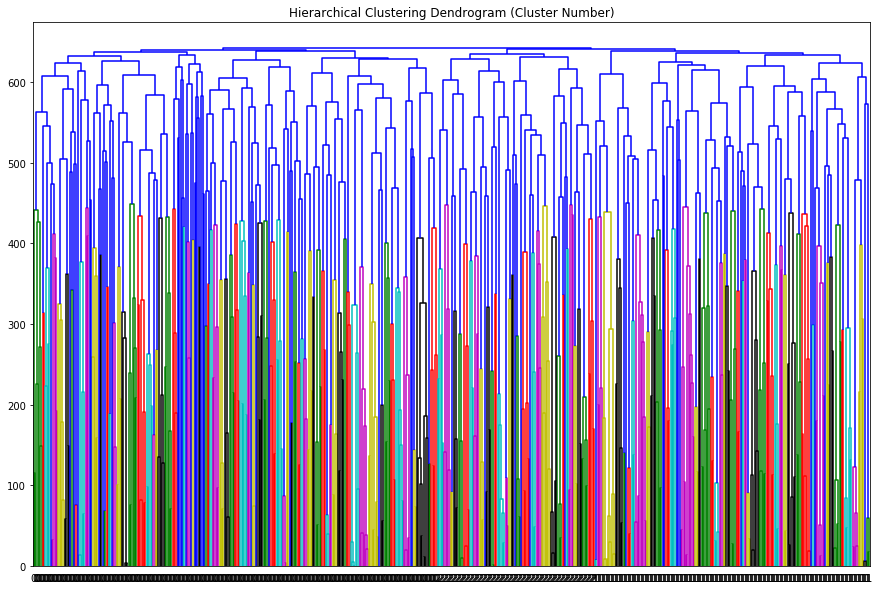

In [100]:
pokemon_new = pd.get_dummies(data=pokemon, drop_first=True)

dum_pok_new = pokemon_new.dropna()
model2 = AgglomerativeClustering(n_clusters=3)
model2 = model.fit(dum_pok_new)
dum_pok_new['cluster'] = model.labels_

plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram (Cluster Number)')
plot_dendrogram(model,labels=model.labels_)
plt.xticks(rotation=0,fontsize = 10)
plt.savefig('pokemon_new.pdf',format='pdf')
plt.show()

Because the dataframe is pretty large, which means too much information, the plot will become much confusing for readers. And basically, the cluster is also more suitable for datasets with smaller number of columns.

### <font color="magenta">Q7: Fit a series of k-means models to the Pokemon dataset.</font>

**Your values of k should range from 2 to 9.**

Select the optimal number of *k*.

Use the four methods suggested above (i.e. educated guess, rule of thumb, elbow method, and silhouette.  Provide plots for the elbow and silhouette methods.  Include 2-D plots of the centroids and individual data points for a reasonable range of *k* values (we suggest 2 to 9).  What, in your opinion, is the best choice for *k*?  What are the characteristics of each of the clusters in your solution (i.e. what characteristics do the members of each cluster have in common?)


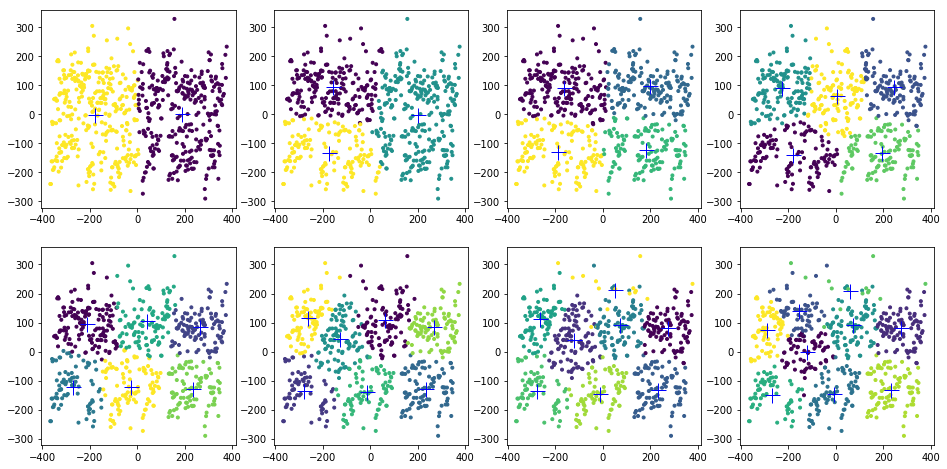

In [114]:
data = dum_pok_new .copy()
pca = PCA(n_components=2).fit(data)
data2d = pca.transform(data)

plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(data)
    scores.append(kmean.score(data))
    n_clusters.append(i)
    pred = kmean.predict(data)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
#     plt.title("{i} clusters silhoute= {a}".format(i,np.round(silhouette_score(data, pred), decimals=5)))
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

Insert your interpretations here.

## END OF NOTEBOOK
Please remember to submit your notebook in both .HTML and .IPYNB formats via Canvas.

(1, 15.65)

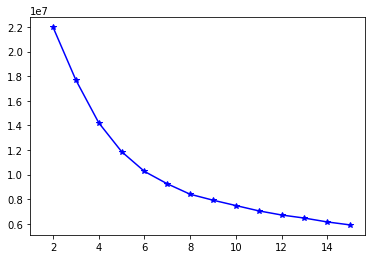

In [115]:
from sklearn import metrics

cost = []
for k in range(2,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(k_means.inertia_)

fig, ax = plt.subplots()
plt.plot(range(2,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])


(1, 15.65)

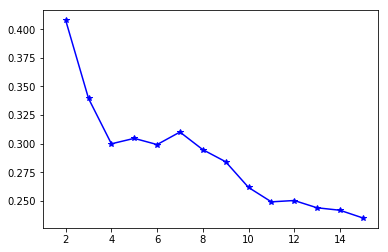

In [116]:
cost = []
for k in range(2,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(metrics.silhouette_score(data, k_means.labels_))

# kIdx = np.argmax(cost)
fig, ax = plt.subplots()
plt.plot(range(2,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

We can see from elbow plot, there is no obvious stable turning point, meaning after some k, the value of y would become quite stable. From the Silhouette Method, the better value in y suggests a better choice of K. Therefore, the plot indicates K= 2, 3, 4 might be better than others. Plus, form the above plots, with the increasing of k, members of each cluster seem to have almost same size of variance, similar distribution , and the boundaries between differed clusters are sill a little ambiguous. 